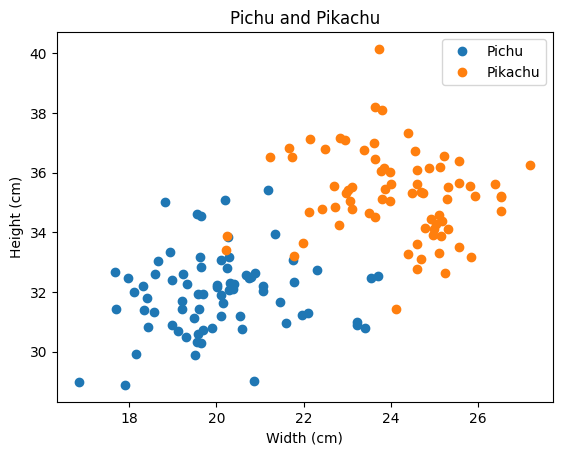


Test data classifiaction.
Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (25.0, 32.0) classified as Pichu

User input data classifiaction.
The values of the points cannot be negative.
The values of the points cannot be negative.
Sample with (width, height): (1.0, 2.0) classified as Pichu.


In [98]:
import math
import matplotlib.pyplot as plt


# Creates functions.
def convert_to_float (input_list):          # function for convert to float.
    output_list_float = []
    for element in input_list:
        sublist = []
        for string in element:
            converted_float = float(string)
            sublist.append(converted_float)
        output_list_float.append(sublist)
    return output_list_float


def find_distance(input_list, test_width, test_height):         # function for find Euclidean distance between points.
    output_distance = []
    for list in input_list:
        sublist =[]
        distance = math.sqrt((list[0] - test_width)**2 + (list[1] - test_height)**2)
        sublist.append(distance)
        sublist.append(list[2])
        output_distance.append(sublist)
    output_distance.sort()
    return output_distance


def output(distance):           # function for output information about point classification.
    if distance[0][1] == 0.0:
        print(f"Sample with (width, height): ({test_width[0]}, {test_height[0]}) classified as Pichu")
    else:
        print(f"Sample with (width, height): ({test_width[0]}, {test_height[0]}) classified as Pikachu")


# Cleans data in datapoints file.
with open ("datapoints.txt","r") as f_read:
    
    datapoints_list_step_01 = [data.strip("\n").replace(",","") for data in f_read.readlines() if data[0].isdigit()]
    datapoints_list_step_02 = [data.split() for data in datapoints_list_step_01]


# Datapoints converts from String to Float.
datapoints_list_float = convert_to_float(datapoints_list_step_02)           # function for convert to float calls.  


# Sorts lists.
pichu_list, pikachu_list = [], []         # main list sorts to separate different type of data.
for element in datapoints_list_float:
    if element[2] == 0.0:
        pichu_list.append(element)
    else:
        pikachu_list.append(element)


# Creates lists with width and height. 
pichu_width, pichu_height = [], []              # width and height for "pichu" simulation data.
for element in pichu_list:
    pichu_width.append(element[0])
    pichu_height.append(element[1])

pikachu_width, pikachu_height = [], []          # width and height for "pikachu" simulation data.
for element in pikachu_list:
    pikachu_width.append(element[0])
    pikachu_height.append(element[1])


# Cleans data in testpoints file.
with open ("testpoints.txt","r") as f_read:
    
   testpoints_list_step_01 = [data.strip("\n").replace(",","").replace("(","").replace(")","") for data in f_read.readlines() if data[0].isdigit()]
   testpoints_list_step_02 = [data.split()[1:] for data in testpoints_list_step_01]


# Testpoints converts from String to Float.
testpoints_list_float = convert_to_float(testpoints_list_step_02)           # function for convert to float calls. 


# Creates lists with width and height.
test_width, test_height = [], []            # width and height for testpoints data.
for element in testpoints_list_float:
    test_width.append(element[0])
    test_height.append(element[1])


# Plotts all points of simulation data.
x1, y1 = pichu_width, pichu_height
x2, y2 = pikachu_width, pikachu_height

plt.plot(x1,y1,'o')
plt.plot(x2,y2,'o')
plt.title("Pichu and Pikachu")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend(["Pichu", "Pikachu"])

plt.show()


# Distance calculation.
distance_01 = find_distance(datapoints_list_float, test_width[0], test_height[0])           # functions for find Euclidean distance between points calls.
distance_02 = find_distance(datapoints_list_float, test_width[1], test_height[1])
distance_03 = find_distance(datapoints_list_float, test_width[2], test_height[2])
distance_04 = find_distance(datapoints_list_float, test_width[3], test_height[3])


# Output information.
print("\nTest data classifiaction.")
print("=========================")
output(distance_01)         # functions for output information about point classification calls.
output(distance_02)
output(distance_03)
output(distance_04)


# User input
print("\nUser input data classifiaction.")
print("===============================")
while True:                                                                     # errors checking
    try:
      test_width_user = float(input("Input width of a testpoint: "))
      if test_width_user < 0:
         raise ValueError ("The values of the points can not be negative.")
      test_height_user = float(input("Input height of a testpoint: "))
      if test_height_user < 0:
         raise ValueError ("The values of the points can not be negative.")
      break                                                                      # breaks out of while loop if nothing went wrong
    except ValueError as err_01:
      print(err_01)


# Creates lists with width and height.
testpoints_user_list = []                               # width and height for uder testpoints data.
testpoints_user_list.append(test_width_user)
testpoints_user_list.append(test_height_user)


# Distance calculation for users input points.
distance_user = find_distance(datapoints_list_float, test_width_user, test_height_user)         # functions for find Euclidean distance between points calls.


# Ten nearest points.
distance_10_nearest = distance_user[:10]            # creates list of ten nearest points.

count_pichu = 0
count_pikachu = 0

for list in distance_10_nearest:            # calculates the number of points for different classes.
    if list[1] == 0.0:
        count_pichu += 1
    else:
        count_pikachu += 1

if count_pichu > count_pikachu:         # compares the number of points for different classes. 
    print(f"Sample with (width, height): ({test_width_user}, {test_height_user}) classified as Pichu.")
elif count_pichu == count_pikachu:
    print(f"Sample with (width, height): ({test_width_user}, {test_height_user}) can be classified as Pichu as Pikachu.")
else:
    print(f"Sample with (width, height): ({test_width_user}, {test_height_user}) classified as Pikachu.")



Accuracy.
The average accuracy is 0.960


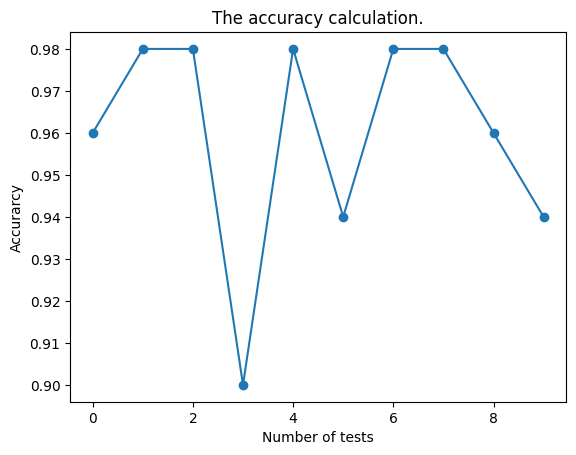

In [99]:
# Bonus exercise.
 
import random as rng

with open ("datapoints.txt","r") as f_read:
    
    datapoints_list_step_01 = [data.strip("\n").replace(",","") for data in f_read.readlines() if data[0].isdigit()]
    data_list = [data.split() for data in datapoints_list_step_01]


# Converts String to Float.
data_list_float = convert_to_float(data_list)           # function for convert to float.


# Randomises data. Creates lists.
Count = 0
accuracy_list = []

while Count<=9:                                          
    rng.shuffle(data_list_float)
    pichu_random, pikachu_random = [], []
    pichu_train, pikachu_train, pichu_test, pikachu_test = [], [], [], []
    for element in data_list_float:
        if element[2] == 0.0:
            pichu_random.append(element)
            pichu_train = pichu_random[:50] 
            pichu_test = pichu_random[50:]
        else:
            pikachu_random.append(element)
            pikachu_train = pikachu_random[:50]
            pikachu_test = pikachu_random[50:]

    pokemon_träningsdata = pichu_train + pikachu_train


# Creates lists with width and height. 
    pichu_test_width, pichu_test_height = [], []

    for element in pichu_test:                              # width and height for "pichu" simulation data.
        pichu_test_width.append(element[0])
        pichu_test_height.append(element[1])

    pikachu_test_width, pikachu_test_height = [], []        # width and height for "pikachu" simulation data.
    for element in pikachu_list:
        pikachu_test_width.append(element[0])
        pikachu_test_height.append(element[1])


# Distance calculation for Pikachu.
    count_pk = 0
    TP = 0
    FP = 0
    while count_pk <=24:
        distance_pikachu_test = find_distance(pokemon_träningsdata,pikachu_test_width[count_pk],pikachu_test_height[count_pk])
        if distance_pikachu_test[0][1] == 1.0:
            TP+=1                               # True and False Positive calculation
        else:
            FP+=1
        count_pk+=1
    

# Distance calculation for Pichu.
    count_pi = 0
    FN = 0
    TN = 0
    while count_pi <=24:
        distance_pichu_test = find_distance(pokemon_träningsdata,pichu_test_width[count_pi],pichu_test_height[count_pi])
        if distance_pichu_test[0][1] == 0.0:
            TN+=1                               # True and False Negative calculation
        else:
            FN+=1
        count_pi+=1

    accuracy = (TP+TN)/(TP+TN+FP+FN)            # Accuracy calculation.
    accuracy_list.append(accuracy)
    Count+= 1


average_accuracy = sum(accuracy_list)/len(accuracy_list)            # Average accuracy calculation.
print("\nAccuracy.")
print("=========")
print (f"The average accuracy is {average_accuracy:.3f}")

# Plotts accuracy.
plt.plot(accuracy_list, '-o')
plt.title("The accuracy calculation.")
plt.xlabel("Number of tests")
plt.ylabel("Accurarcy")

plt.show()